In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
m = pd.read_csv("/home/bruce1996/data/MCI/curatedMetagenomic/total_relative_abundance_matrix.txt",sep='\t',index_col=0)
relative_m = m.apply(lambda x : x / sum(x))
idx = [bool(re.search('g__Bifidobacterium',x)) for x in relative_m.index]
bifido_m = relative_m.loc[idx,:]
bifido_m.index = [x.split('|')[-1] for x in bifido_m.index]

In [3]:
bifido_sig = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.2/mci/signature_matrix/Bifidobacterium_signature_coefficient_matrix.txt",sep='\t',index_col=0)
target_bifido = bifido_sig.columns
bifido_m = bifido_m.T

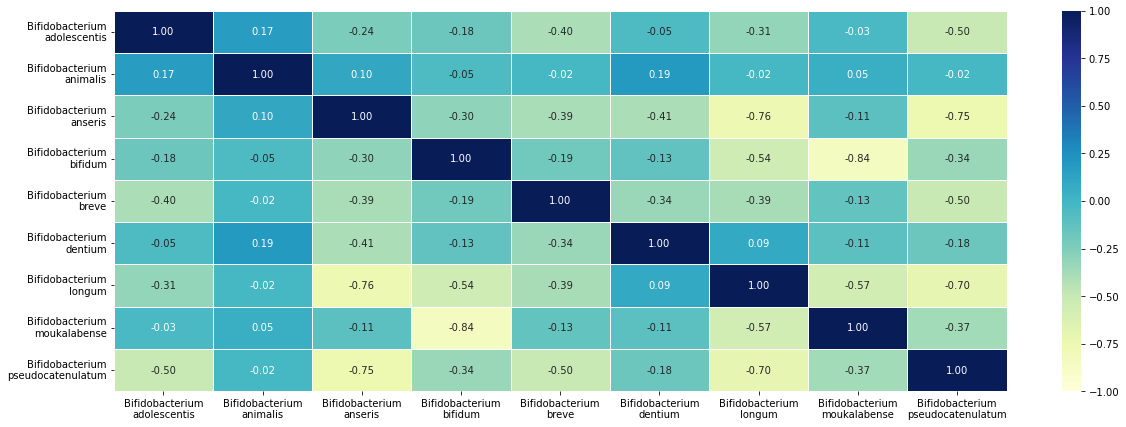

In [4]:
from scipy.stats import spearmanr

corr_m = np.zeros([9,9],dtype=np.float16)
for i in range(9) :
    for j in range(9) :
        idx = np.where((bifido_m.iloc[:,i] > 0) | (bifido_m.iloc[:,j] > 0))[0]
        res = spearmanr(bifido_m.iloc[idx,i],bifido_m.iloc[idx,j])
        corr_m[i,j] = res[0]
idx = [x[3:].replace('_','\n') for x in target_bifido]
df = pd.DataFrame(corr_m,index=idx,columns=idx)

plt.figure(figsize=(20,7))
g = sns.heatmap(df,annot=True,fmt='0.2f',vmax=1,vmin=-1,cmap='YlGnBu',linewidths=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
plt.savefig("/home/bruce1996/data/MCI/curatedMetagenomic/bifido_corr_heatmap.png",dpi=300)

In [75]:
con = 'mci'
df = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.2/%s/subtype/%s_sig_subtype.txt" % (con,con),sep='\t',index_col=0)
idx = [x[3:].replace('_',' ') for x in target_lacto]
df.loc[idx,:].sort_values(by=['Signature','Subtype']).to_csv("/home/bruce1996/data/MCI/manuscript_v3.2/%s/subtype/%s_sig_subtype.txt" % (con,con),sep='\t')

In [74]:
df.loc[idx,:].sort_values(by=['Signature','Subtype']).shape

(26, 2)

In [69]:
df

,Subtype,Signature
species,,
Lactobacillus acetotolerans,Lactobacillus,None
Lactobacillus acidifarinae,Levilactobacillus,None
Lactobacillus acidipiscis,Ligilactobacillus,None
Lactobacillus acidophilus,Lactobacillus,LS3
Lactobacillus agilis,Ligilactobacillus,LS1
...,...,...
Lactobacillus xiangfangensis,Lactiplantibacillus,None
Lactobacillus zymae,Levilactobacillus,None
Lactococcus lactis,no phylogroup,None


In [66]:
bifido_sig_d = {'s__Bifidobacterium_adolescentis' : 'BS1', 's__Bifidobacterium_animalis' : 'None',
       's__Bifidobacterium_anseris' : 'None', 's__Bifidobacterium_bifidum' : 'BS1,BS3',
       's__Bifidobacterium_breve' : 'None', 's__Bifidobacterium_dentium' : 'BS1,BS3',
       's__Bifidobacterium_longum' : 'BS2,BS3', 's__Bifidobacterium_moukalabense' : 'None',
       's__Bifidobacterium_pseudocatenulatum' : 'BS2'}

df = pd.DataFrame({'Species' : target_bifido})
df['Signature'] = df['Species'].replace(bifido_sig_d)
df['Species'] = [x[3:].replace('_',' ') for x in target_bifido]
df.sort_values(by='Signature').to_csv('/home/bruce1996/data/MCI/manuscript_v3.2/normal/subtype/normal_bifido_sig.txt',sep='\t',index=False)

In [ ]:
bifido_sig_1 = ['s__Bifidobacterium_adolescentis','s__Bifidobacterium_bifidum']
bifido_sig_2 = ['s__Bifidobacterium_pseudocatenulatum','s__Bifidobacterium_longum']
bifido_sig_3 = ['s__Bifidobacterium_longum','s__Bifidobacterium_bifidum']
sig_d = {'bifido_sig_1' : bifido_sig_1,'bifido_sig_2' : bifido_sig_2,'bifido_sig_3':bifido_sig_3}
for key,val in sig_d.items() :
    plt.figure(figsize=(20,5))
    idx = [x[3:].replace('_','\n') for x in val]
    g = sns.heatmap(df.loc[idx,:],annot=True,fmt='0.2f',vmax=1,vmin=-1,cmap='YlGnBu',linewidths=0.5)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
    plt.savefig("/home/bruce1996/data/MCI/curatedMetagenomic/bifido_%s_corr_heatmap.png" % key,dpi=300)

### Lacto subtype correlation

In [5]:
import os,sys
path = os.path.abspath("/home/bruce1996/repo/Microbiome_health_indicator/manuscript/")
sys.path.append(path)
from subtype import *

In [53]:
target_lacto_m = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.2/mci/abundance_matrix/mci_lacto_abundance_matrix.txt",sep='\t',index_col=0)
target_lacto = list(target_lacto_m.index)
target_lacto.remove('s__Lactobacillus_casei_group')
#target_lacto.remove('s__Lactobacillus_rogosae')


idx = [bool(re.search('g__Lactobacillus',x)) for x in relative_m.index]
lacto_m = relative_m.loc[idx,:]
lacto_m.index = [x.split('|')[-1] for x in lacto_m.index]

In [54]:
subtype_reference = pd.read_csv("/home/bruce1996/data/MCI/subtyping/Lactobacillus_group.csv")
lacto_matrix = lacto_m.loc[target_lacto,:]
subtype_matrix,subtype_d = metaphlan_subtype(lacto_matrix,subtype_reference,'Lactobacillus','species','phylogroup')
ab_matrix = pd.concat([subtype_matrix.T,bifido_m],axis=1)

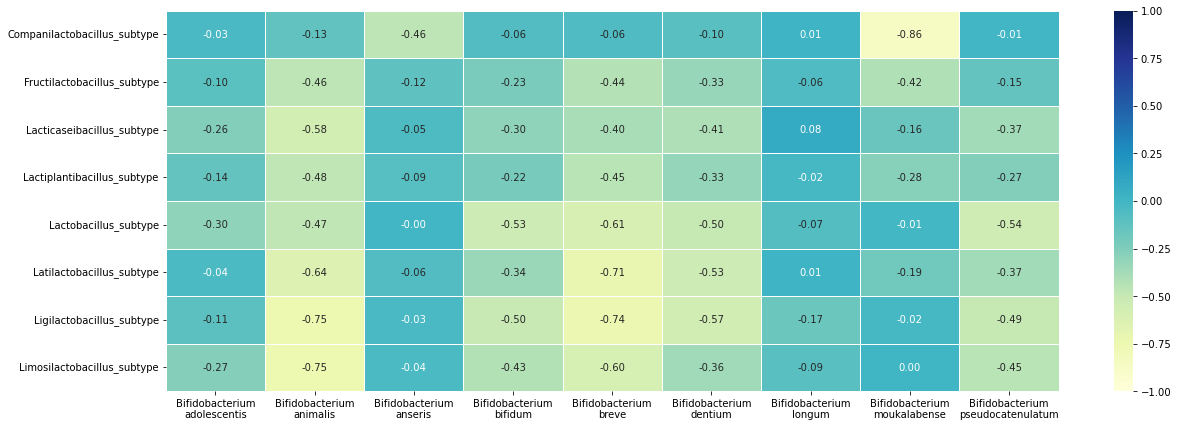

In [10]:
from scipy.stats import spearmanr

corr_m = np.zeros([8,len(target_bifido)],dtype=np.float16)
for l_idx,lacto in enumerate(subtype_matrix.index) :
    for b_idx,bifido in enumerate(target_bifido) :
        idx = ab_matrix.index[np.where((ab_matrix[lacto] > 0) | (ab_matrix[bifido] > 0),True,False)]
        res = spearmanr(ab_matrix.loc[idx,lacto],ab_matrix.loc[idx,bifido])
        corr_m[l_idx,b_idx] = res[0]

df = pd.DataFrame(corr_m,index=subtype_matrix.index,columns=[x[3:].replace('_','\n') for x in target_bifido])

plt.figure(figsize=(20,7))
g = sns.heatmap(df,annot=True,fmt='0.2f',vmax=1,vmin=-1,cmap='YlGnBu',linewidths=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
plt.savefig("/home/bruce1996/data/MCI/curatedMetagenomic/lacto_subtype_bifido_corr_heatmap.png",dpi=300)

In [ ]:
lacto_sig_1 = ['s__Bifidobacterium_adolescentis','s__Bifidobacterium_bifidum']
lacto_sig_2 = ['s__Bifidobacterium_pseudocatenulatum','s__Bifidobacterium_longum']
lacto_sig_3 = ['s__Bifidobacterium_longum','s__Bifidobacterium_bifidum']
sig_d = {'lacto_sig_1' : lacto_sig_1,'lacto_sig_2' : lacto_sig_2,'lacto_sig_3':lacto_sig_3}
subtype_m = df.copy()
subtype_m.index = [x.split('_')[0] for x in subtype_m.index]
for key,val in sig_d.items() :
    plt.figure(figsize=(20,5))
    idx = [x[3:].replace('_','\n') for x in val]
    g = sns.heatmap(subtype_m.loc[:,idx].T,annot=True,fmt='0.2f',vmax=1,vmin=-1,cmap='YlGnBu',linewidths=0.5)
    g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
    plt.savefig("/home/bruce1996/data/MCI/curatedMetagenomic/lacto_subtype_bifido_%s_corr_heatmap.png" % key,dpi=300)

### Bifido prevalence

In [95]:
prevalence = lambda x : (sum(x > 0) / len(x)) * 100
target_bifido_m = bifido_m.loc[:,target_bifido].T
bifido_pv = target_bifido_m.apply(prevalence,axis=1)
bifido_mean = target_bifido_m.mean(axis=1)
df = pd.DataFrame({'Mean abundance' : bifido_mean * 100,'Prevalence' : bifido_pv},index=target_bifido)
df.index = [x[3:].replace('_',' ') for x in target_bifido]
df['Species'] = df.index

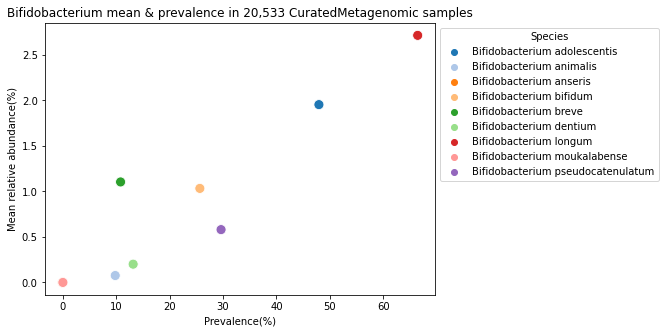

In [112]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Prevalence',y='Mean abundance',hue='Species',palette="tab20",s=100)
plt.xlabel("Prevalence(%)")
plt.ylabel("Mean relative abundance(%)")
plt.legend(bbox_to_anchor=[1,1],ncol=1,title="Species")
plt.title("Bifidobacterium mean & prevalence in 20,533 CuratedMetagenomic samples")
plt.savefig("/home/bruce1996/data/MCI/curatedMetagenomic/mean_prevalence_scatterplot.png",dpi=300)